# TCP Classification - Exploratory Data Analysis (EDA)

This notebook does a series of operations as part of my exploratory data analysis.

This includes:
1. Loads the dataset
2. Looks at the dataset
3. Cleans the dataset
4. Applies Three Types of Analysis
5. Visualizes using Two Methods

At the end of the notebook, a conclusion of results is provided.

## Transform Dataset

Given the dataset (acquired from https://www.kaggle.com/datasets/peterfriedrich1/dns-test-traffic-dohbrw2020?resource=download) is broken into two separate files:
1. raw_benign.csv (renamed from benign-chrome.csv)
2. raw_malicious.csv (renamed from mal-dns2tcp.csv)

I need to combine them into one data frame, label them, and then export the data frame back to disk to avoid having to do all of the operations in memory.

### Load the datasets

In [2]:
import pandas as pd

# Load the benign and malicious CSV files
benign_df = pd.read_csv('data/raw_benign.csv')
malicious_df = pd.read_csv('data/raw_malicious.csv')

### Add Label Column

In [3]:
# Add a label column to each DataFrame
benign_df['label'] = 0  # Label benign traffic as 0
malicious_df['label'] = 1  # Label malicious traffic as 1

### Combine the Dataframes

In [4]:
# Combine the benign and malicious DataFrames
combined_df = pd.concat([benign_df, malicious_df], ignore_index=True)

### Save the Concatenated Dataframe to Disk

In [5]:
# Save the combined DataFrame to a new CSV file
combined_df.to_csv('data/combined_traffic.csv', index=False)

## Load the Dataset

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/combined_traffic.csv')

## Understand the Dataset

In [7]:
# Basic info
print(df.info())

# First few rows
print(df.head())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712981 entries, 0 to 712980
Data columns (total 36 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   SourceIP                                712981 non-null  object 
 1   DestinationIP                           712981 non-null  object 
 2   SourcePort                              712981 non-null  int64  
 3   DestinationPort                         712981 non-null  int64  
 4   TimeStamp                               712981 non-null  object 
 5   Duration                                712981 non-null  float64
 6   FlowBytesSent                           712981 non-null  int64  
 7   FlowSentRate                            712981 non-null  float64
 8   FlowBytesReceived                       712981 non-null  int64  
 9   FlowReceivedRate                        712981 non-null  float64
 10  PacketLengthVariance                    7129

## Data Cleaning

In [8]:
# Check for missing values
print(df.isnull().sum())

# Fill or remove missing values
df = df.dropna()

SourceIP                                     0
DestinationIP                                0
SourcePort                                   0
DestinationPort                              0
TimeStamp                                    0
Duration                                     0
FlowBytesSent                                0
FlowSentRate                                 0
FlowBytesReceived                            0
FlowReceivedRate                             0
PacketLengthVariance                         0
PacketLengthStandardDeviation                0
PacketLengthMean                             0
PacketLengthMedian                           0
PacketLengthMode                             0
PacketLengthSkewFromMedian                   0
PacketLengthSkewFromMode                     0
PacketLengthCoefficientofVariation           0
PacketTimeVariance                           0
PacketTimeStandardDeviation                  0
PacketTimeMean                               0
PacketTimeMed

In [9]:
# Remove duplicate rows
df = df.drop_duplicates()

## One Hot Encode the IP Address

In [10]:
import ipaddress

df['SourceIP'] = df['SourceIP'].apply(lambda x: int(ipaddress.ip_address(x)))

df['DestinationIP'] = df['DestinationIP'].apply(lambda x: int(ipaddress.ip_address(x)))

## Convert Timestamp to Datetime Object

In [11]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

# Convert to Unix timestamp
df['unix_timestamp'] = df['TimeStamp'].astype('int64') // 10**9  # Divide nanoseconds by 10^9 to get seconds
df = df.drop('TimeStamp', axis=1)

## Write out the Dataframe to Disk

In [12]:
df.to_csv("data/cleaned_data.csv", index=False)

## Compare Features of Benign and Malicious Traffic

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get list of numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

## Univariate Analysis

### Numerical Variables

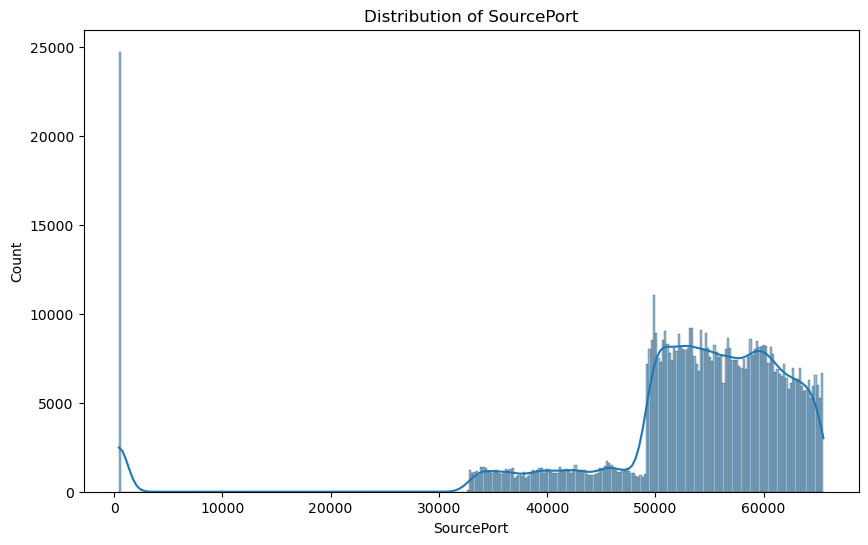

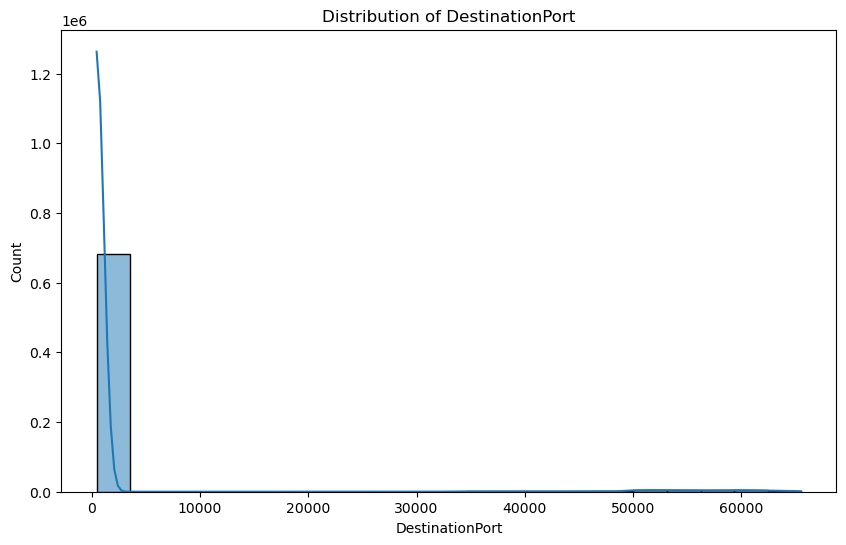

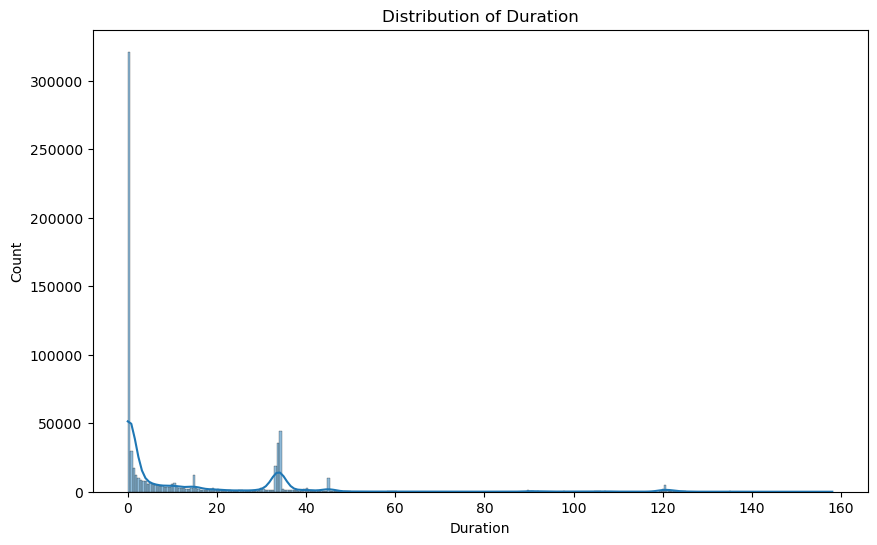

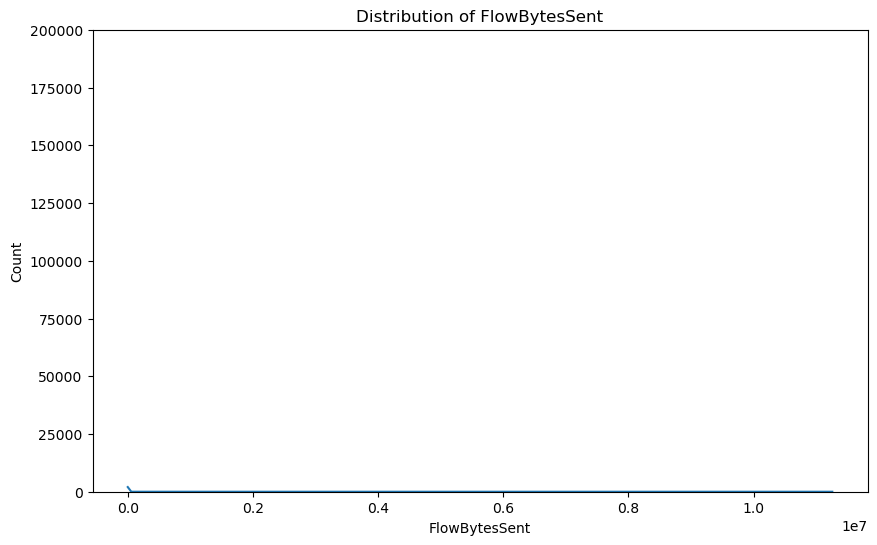

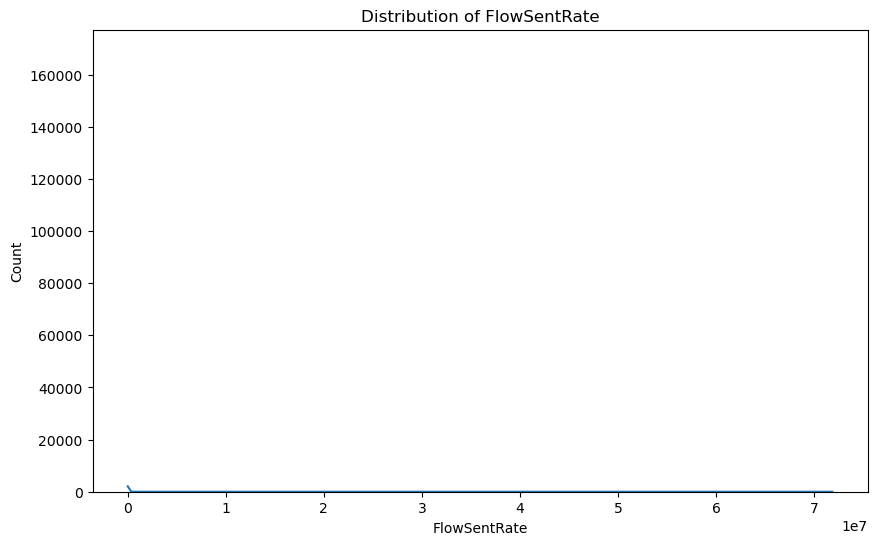

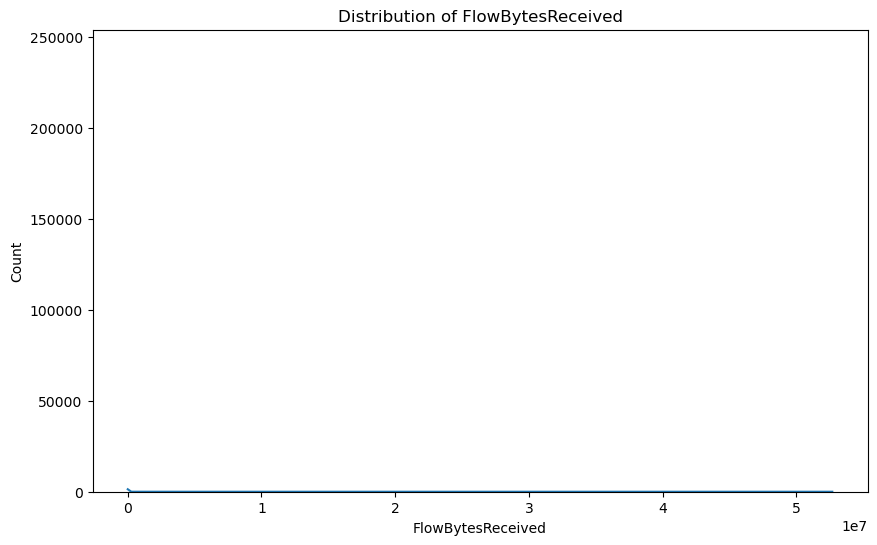

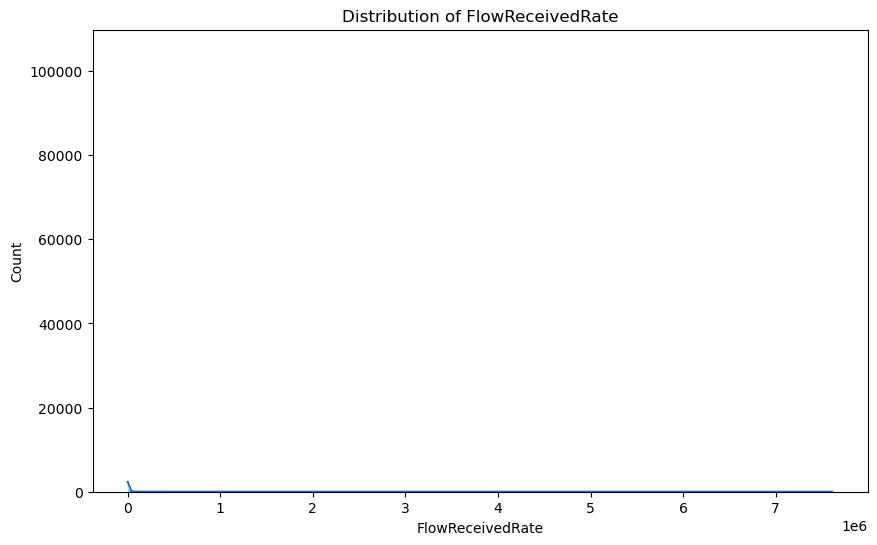

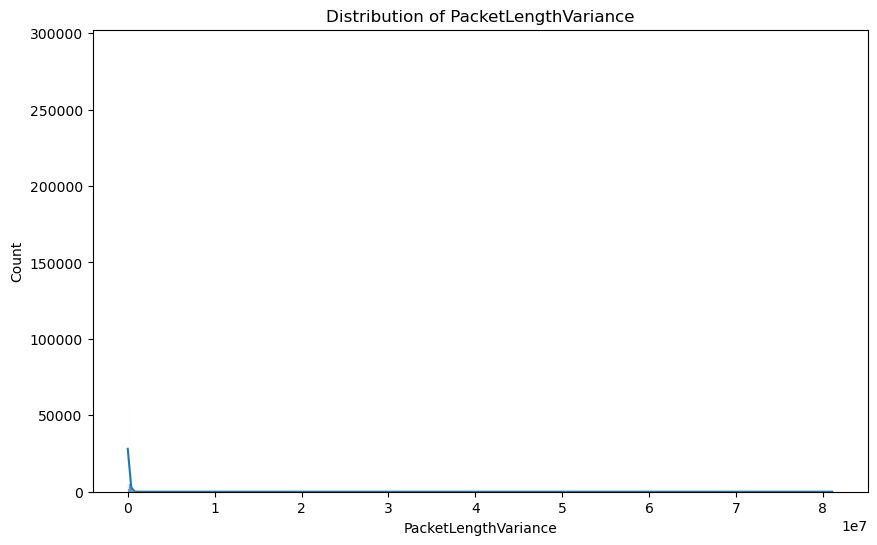

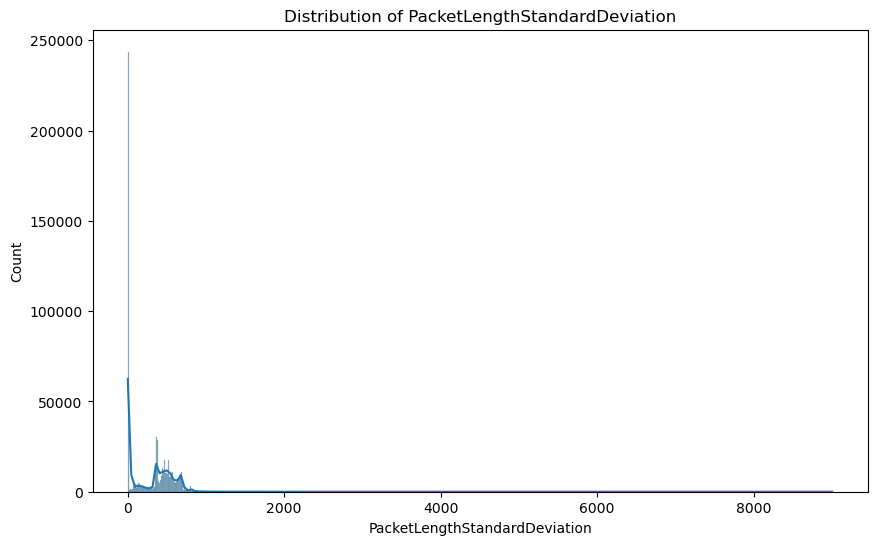

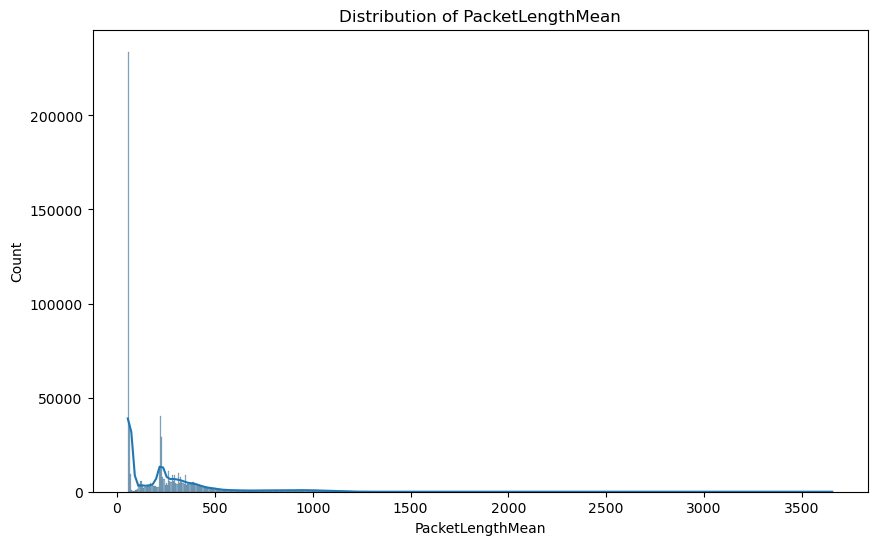

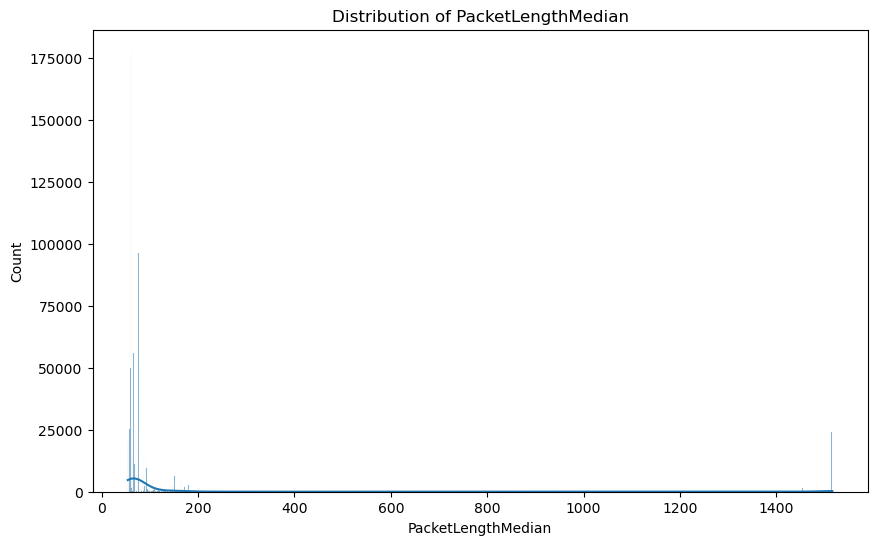

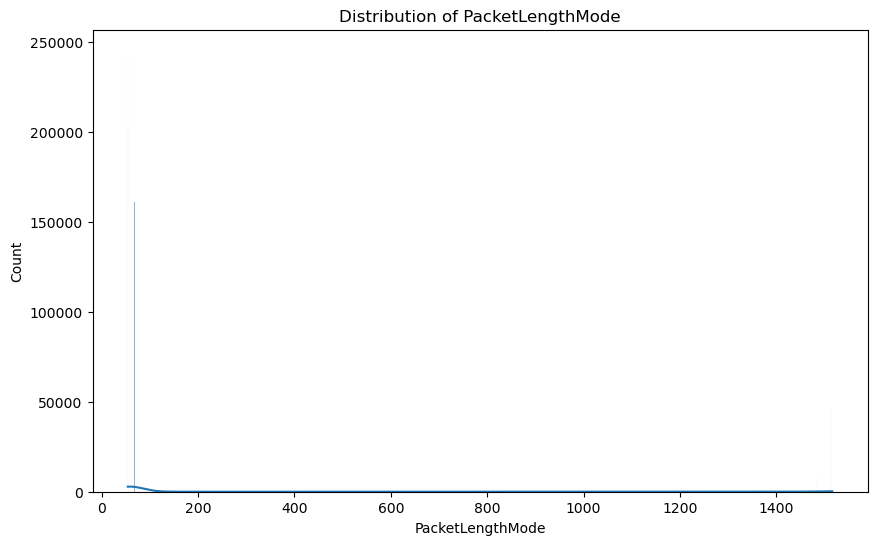

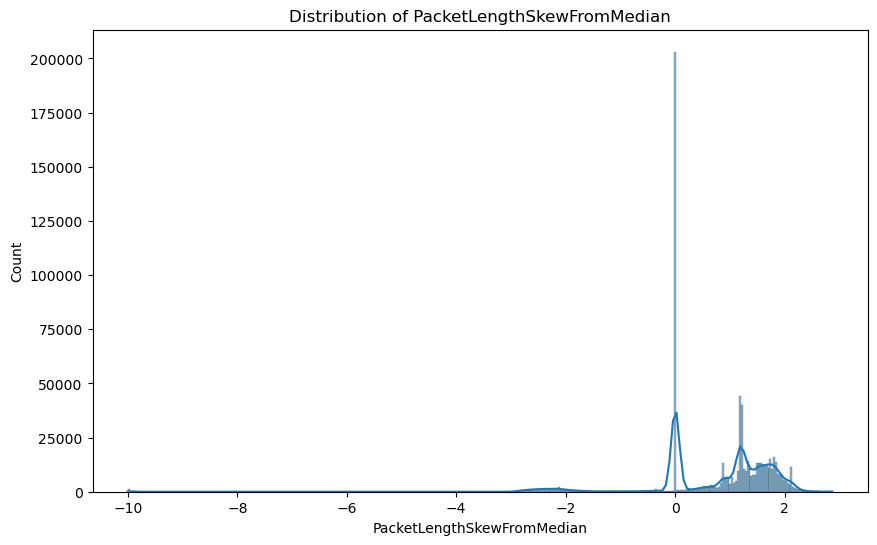

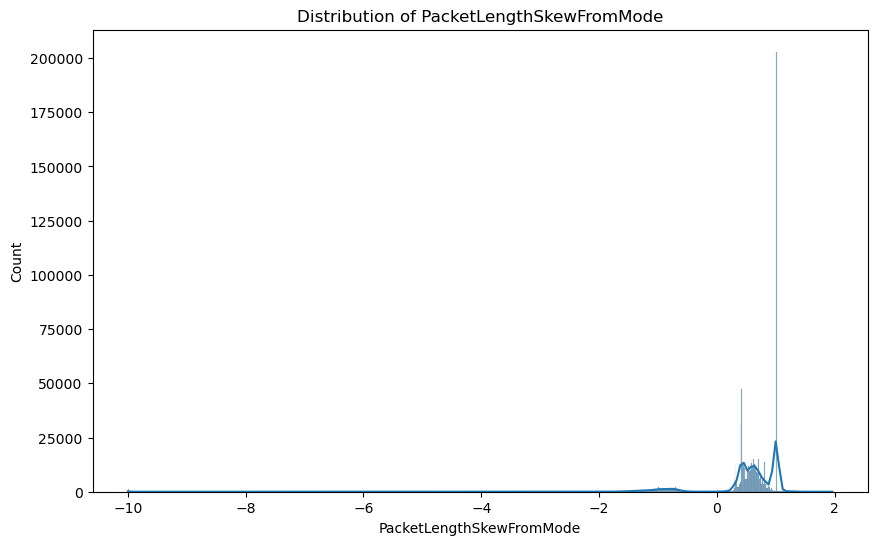

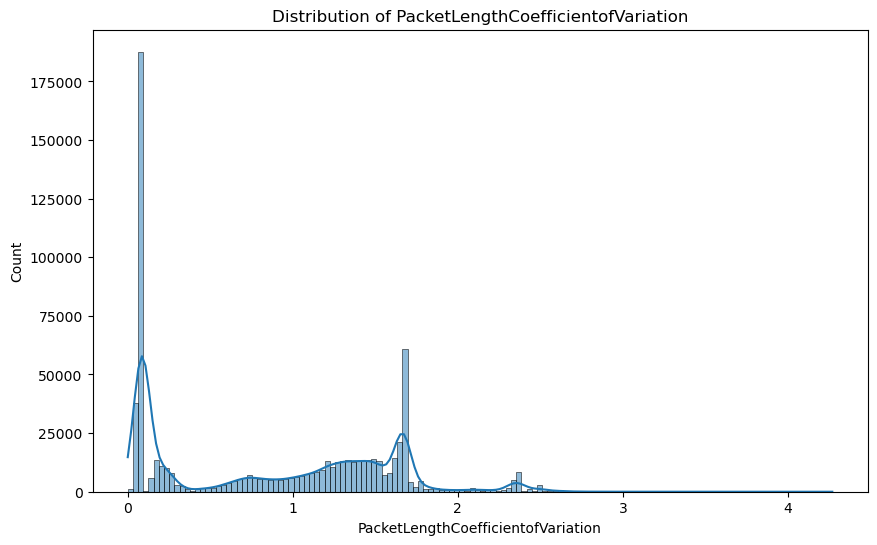

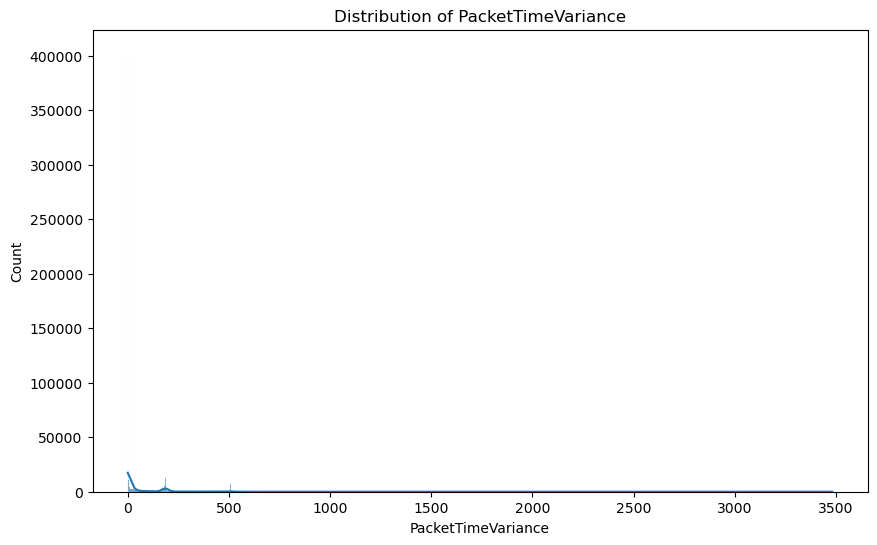

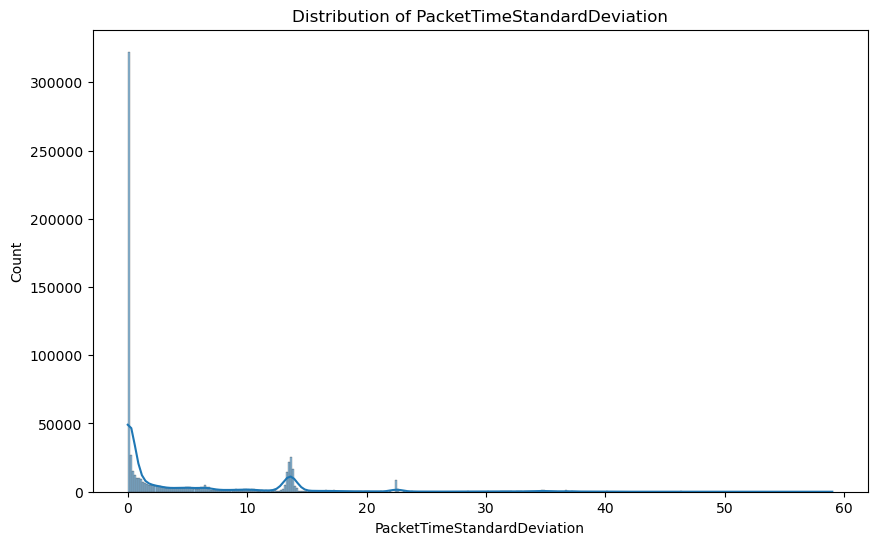

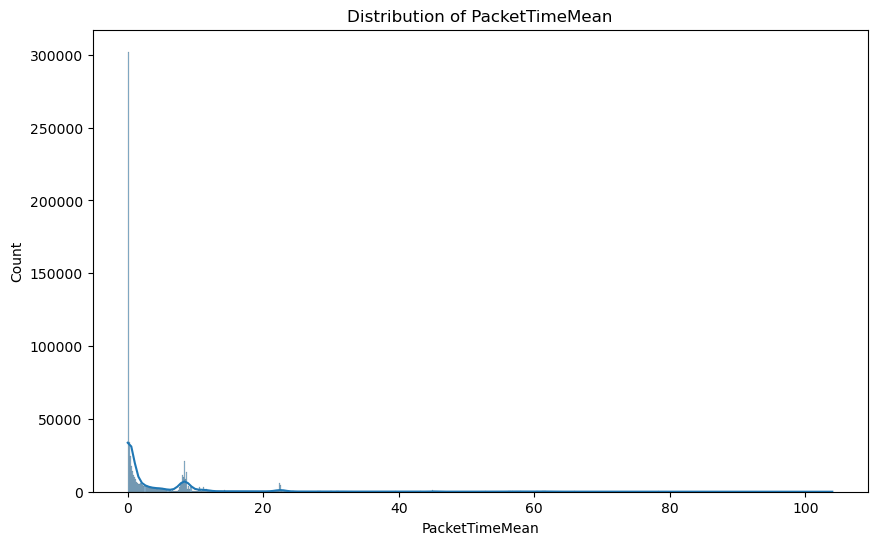

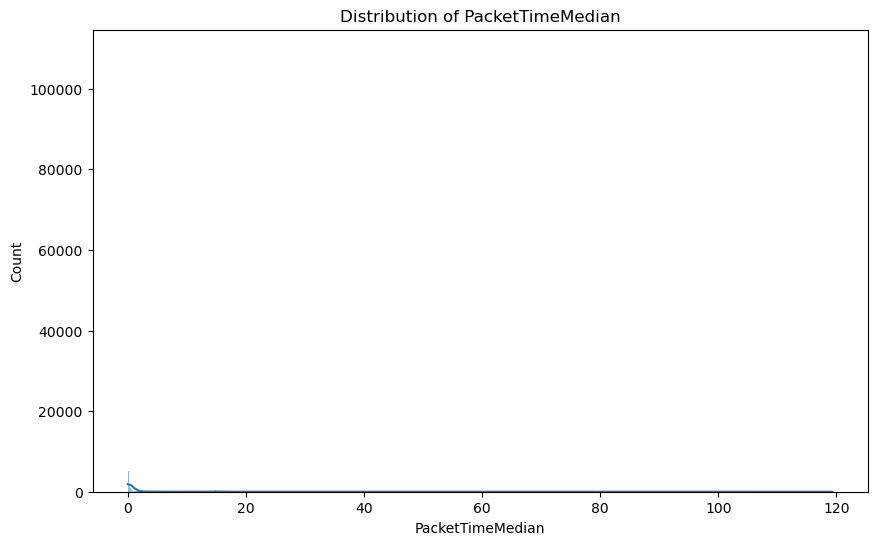

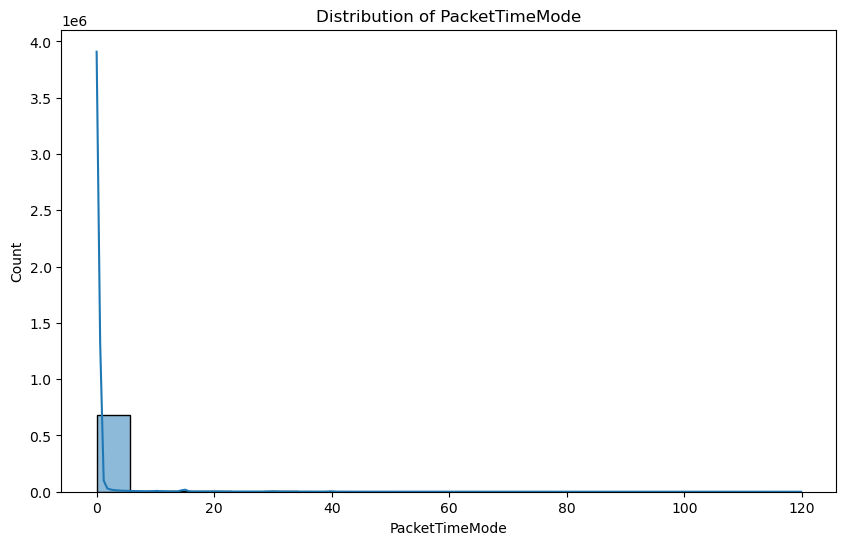

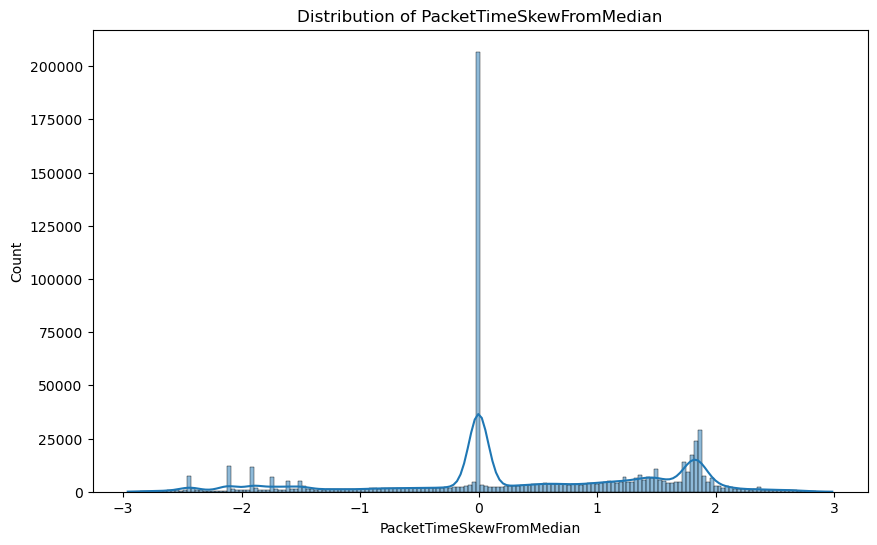

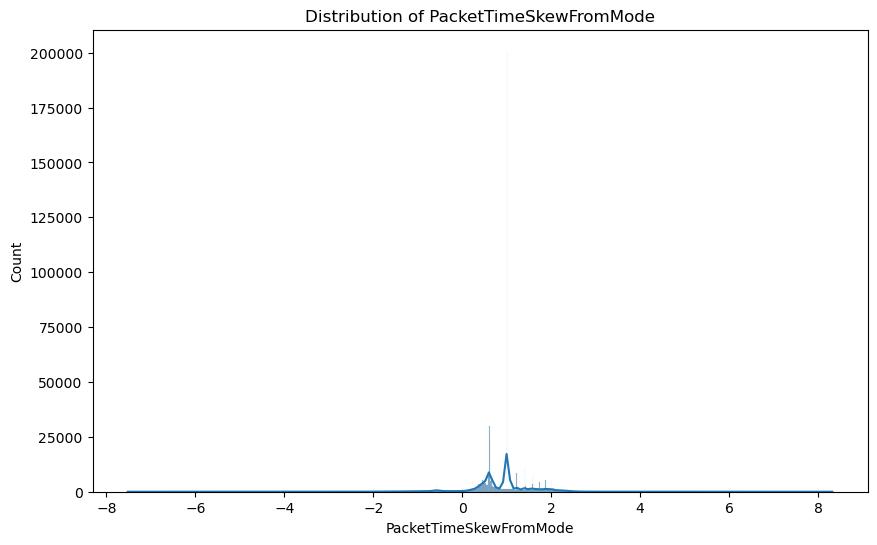

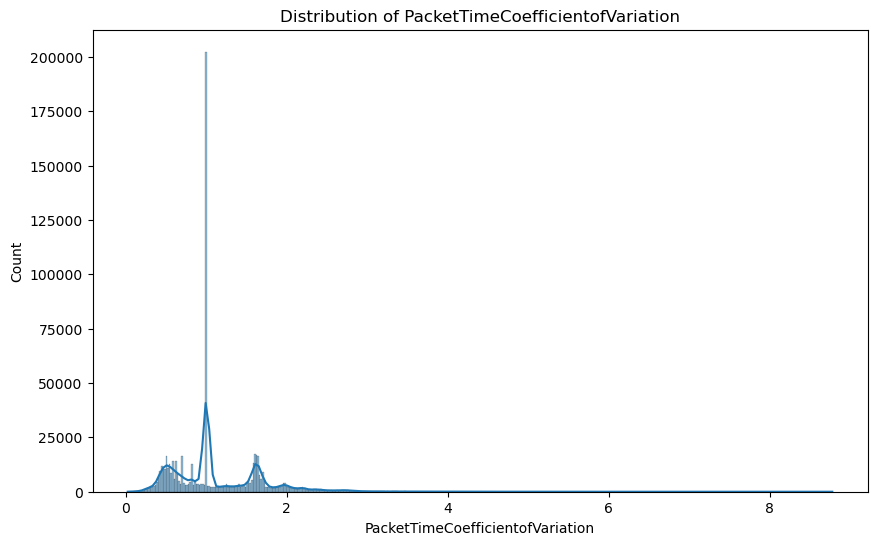

In [ ]:
# Plot histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    print("\n") # For some spacing between the plots

# Outlier Detection

In [11]:
from sklearn.ensemble import IsolationForest

features = df[['Duration', 'FlowBytesSent', 'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate',
               'PacketLengthVariance', 'PacketLengthStandardDeviation', 'PacketLengthMean', 
               'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian', 
               'PacketLengthSkewFromMode', 'PacketLengthCoefficientofVariation', 'PacketTimeVariance',
               'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian', 'PacketTimeMode',
               'PacketTimeSkewFromMedian', 'PacketTimeSkewFromMode', 'PacketTimeCoefficientofVariation', 
               'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 
               'ResponseTimeTimeMedian', 'ResponseTimeTimeMode', 'ResponseTimeTimeSkewFromMedian', 
               'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation']]

# Initialize the IsolationForest model
iso_forest = IsolationForest(contamination=0.01)

# Fit the model and predict outliers
df['outlier'] = iso_forest.fit_predict(features)

# Interpret results
outliers = df[df['outlier'] == -1]
print("Number of outliers detected:", len(outliers))
print(outliers)

Number of outliers detected: 7076
              SourceIP    DestinationIP  SourcePort  DestinationPort  \
130     192.168.20.191   72.247.168.197       51064              443   
184     192.168.20.191    23.237.127.19       51114              443   
300     192.168.20.191  172.217.164.232       49285              443   
301     192.168.20.191     157.240.2.25       51062              443   
302     192.168.20.191      31.13.80.36       51069              443   
...                ...              ...         ...              ...   
712917         8.8.4.4   192.168.20.211         443            54162   
712932         8.8.4.4   192.168.20.207         443            45260   
712933         8.8.4.4   192.168.20.207         443            45260   
712934         8.8.4.4   192.168.20.207         443            45260   
712935         8.8.4.4   192.168.20.207         443            45260   

                  TimeStamp    Duration  FlowBytesSent  FlowSentRate  \
130     2020-01-14 15:49:13  

## Feature Importance Analysis

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

target = df['outlier']

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

# Fit the model
rf.fit(features, target)

# Get feature importances
importances = rf.feature_importances_

## Feature Importance Plot

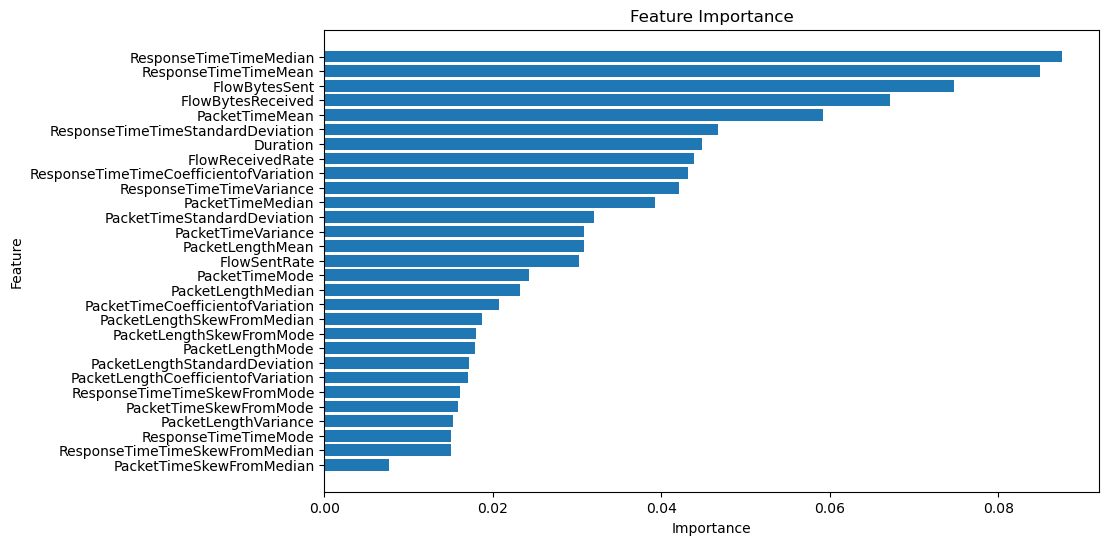

In [22]:
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Correlation Analysis

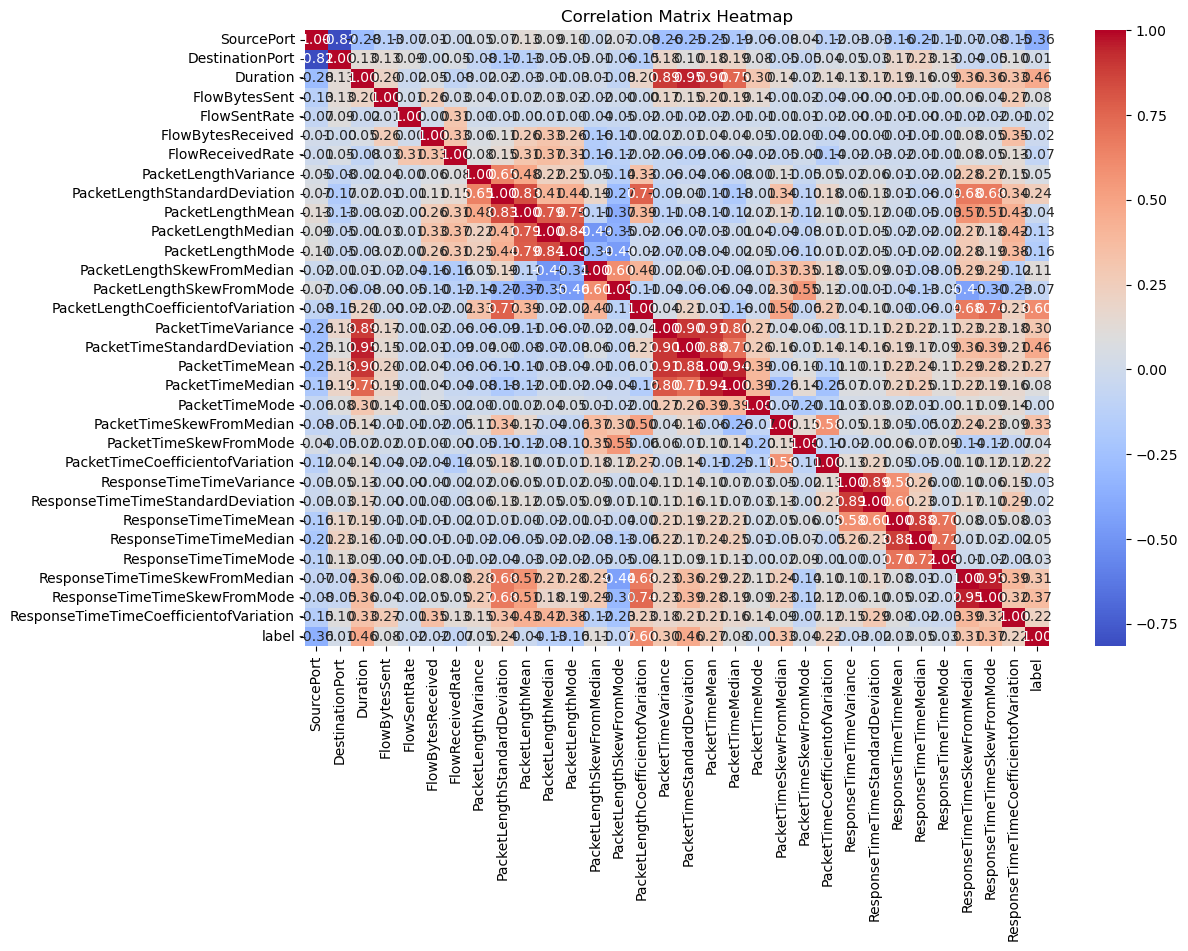

In [38]:
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])

# Correlation matrix with numeric columns only
corr_matrix = df_numeric.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Conclusion

### Goal Overview
While additional analysis and visualizations such as performing plots between numerical and categorical plots would be helpful, memory constraints prevented this from occurring.

However, the main goal of this work was to load the data and start exploring it. From this standpoint, this was achieved.  Diving into the data and establishing how I wanted to handle the split files of benign and malicious data and then the data cleaning aspect of handling missing values, duplicates and data types.



### Analysis and Next Steps

Given the number of outliers was quite high at 7076, the data has a lot of diversity, making training a model challenging.

Subsequent steps should include using Ray or another hyper-parameter tuning technique to lower the count, such as increasing the contamination parameter to 0.02 from 0.01. The feature selection, as shown in the plots, indicates not all features are important, so reducing the feature space is also a necessary step.

### Additional Steps:
1. Data Preprocessing: Use outlier detection (e.g., Isolation Forest), impute missing values.
2. Feature Engineering: Create interaction and polynomial features, scale, and normalize.
3. Model Selection: Implement cross-validation, try ensemble methods.
4. Hyperparameter Tuning: Utilize tools like Optuna, conduct grid/random search.
5. Model Evaluation: Use multiple metrics, plot learning curves, conduct error analysis.
6. Model Interpretability: Analyze feature importance, use SHAP values.